# E-Commerce Customer Behavior using Random Forest

In [4]:
# Import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

Resources Data and References:
1. https://towardsdatascience.com/interpreting-random-forest-and-other-black-box-models-like-xgboost-80f9cc4a3c38
2. https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store
3. https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store/code

## Exploratory Data Analysis

### 1. Data Overview

An Exploratory Data Analysis (EDA) on a set of customer behavior data for 1 month (November, 2019) from a large multi-category online store.

In [2]:
# Read Dataset
df = pd.read_parquet('2019-Nov.parquet')

In [3]:
# To show the first 10 rows of dataset
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,None,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,2019-11-01 00:00:01 UTC,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
6,2019-11-01 00:00:01 UTC,view,1306421,2053013558920217191,computers.notebook,hp,514.56,514028527,df8184cc-3694-4549-8c8c-6b5171877376
7,2019-11-01 00:00:02 UTC,view,15900065,2053013558190408249,None,rondell,30.86,518574284,5e6ef132-4d7c-4730-8c7f-85aa4082588f
8,2019-11-01 00:00:02 UTC,view,12708937,2053013553559896355,None,michelin,72.72,532364121,0a899268-31eb-46de-898d-09b2da950b24
9,2019-11-01 00:00:02 UTC,view,1004258,2053013555631882655,electronics.smartphone,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0


In [4]:
# To show the first rows of dataset using transpose
d = df.head(3)
d.T

,0,1,2
event_time,2019-11-01 00:00:00 UTC,2019-11-01 00:00:00 UTC,2019-11-01 00:00:01 UTC
event_type,view,view,view
product_id,1003461,5000088,17302664
category_id,2053013555631882655,2053013566100866035,2053013553853497655
category_code,electronics.smartphone,appliances.sewing_machine,None
brand,xiaomi,janome,creed
price,489.07,293.65,28.31
user_id,520088904,530496790,561587266
user_session,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,8e5f4f83-366c-4f70-860e-ca7417414283,755422e7-9040-477b-9bd2-6a6e8fd97387


In [5]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [6]:
# Show dataset table count
df.count()

event_time       67501979
event_type       67501979
product_id       67501979
category_id      67501979
category_code    45603808
brand            58277901
price            67501979
user_id          67501979
user_session     67501969
dtype: int64

In [7]:
# Summarize the training set
df.describe()

,product_id,category_id,price,user_id
count,6.750198e+07,6.750198e+07,6.750198e+07,6.750198e+07
mean,1.251406e+07,2.057898e+18,2.924593e+02,5.386397e+08
std,1.725741e+07,2.012549e+16,3.556745e+02,2.288516e+07
min,1.000365e+06,2.053014e+18,0.000000e+00,1.030022e+07
25%,1.305977e+06,2.053014e+18,6.924000e+01,5.164762e+08
50%,5.100568e+06,2.053014e+18,1.657700e+02,5.350573e+08
75%,1.730075e+07,2.053014e+18,3.603400e+02,5.610794e+08
max,1.000286e+08,2.187708e+18,2.574070e+03,5.799699e+08


In [8]:
# Count null values
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64

In [9]:
# Identifying unique data
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
event_time,2549559
event_type,3
product_id,190662
category_id,684
category_code,130
brand,4201
price,60435
user_id,3696117
user_session,13776051


In [10]:
num_users = df['user_id'].nunique()
num_products = df['product_id'].nunique()
num_categories = df['category_id'].nunique()
num_taxonomies = df['category_code'].nunique()
num_brands = df['brand'].nunique()
print('Total number of users: ',num_users)
print('Total number of products: ', num_products)
print('Total number of categories: ', num_categories)
print('Total number of taxonomies: ', num_taxonomies)
print('Total number of brands: ', num_brands)

Total number of users:  3696117
Total number of products:  190662
Total number of categories:  684
Total number of taxonomies:  129
Total number of brands:  4200


1. We have __user_id__ to show the number of users, there are __3696117 users__

2. We have __product_id__ to show the number of different products,n there are __190662 different products__

3. We have __684__ categories within __129 taxonomies__ and __4200 brands__
- The __category_id__ column contains numerical identifiers for different categories of products. Each product is assigned a specific category_id to indicate its category.
- The __category_code__ column contains hierarchical codes that describe the product's category and subcategory. These codes can be more specific and detailed, providing a structured way to categorize products based on their characteristics.

#### Numeric Data Analysis
#### Price Analysis

In [11]:
max_price = df['price'].max().round(0)
min_price = df['price'].min().round(0)
avg_price = df['price'].mean().round(0)
print('Maximum of Price: ', max_price, ' USD')
print('Minimum of Price: ', min_price, ' USD')
print('Average of Price: ', avg_price, ' USD')

Maximum of Price:  2574.0  USD
Minimum of Price:  0.0  USD
Average of Price:  292.0  USD


The product price can be further used for sale analysis, forecasting, and customer behavior or segmentation analysis

Since category_id is used for the purpose of enhancing computing speed, it has less insight for analysis and less human-readable, thus we will focus mainly on category_code. From the data we can see that, category_code follows a hierarchical structure, where each level of the hierarchy is separated by periods. Specifically, it has a structure of __<category_1.category_2.category_3....>__ with multiple levels. Let us separate those by the first period ('.'), split the category_code into 2 columns including __main_category__ and __sub_category__ and get a closer look.

In [12]:
# Copy to new dataframe to avoiding from adjusting the original dataframe
df_Nov = df.copy()
print('Copy successfully')

Copy successfully


In [13]:
# Split by the first period (n=1)
df_Nov[['main_category', 'sub_category']] = df_Nov['category_code'].str.split('.', n=1, expand=True)
print('Split successfully')

Split successfully


In [14]:
# Save to Hierarchical Data Format (HDF)
df_Nov.to_parquet(f'2019-Nov-feat.parquet', index=False)

In [15]:
# Read the data
df_Nov = pd.read_parquet(f'2019-Nov-feat.parquet') 

In [16]:
# Rearrange the columns
#data_Oct = data_Oct.drop(columns=['category_code'])
new_order = ['event_time', 'event_type', 'product_id', 'category_id', 'main_category', 'sub_category', 'brand', 'price', 'user_id', 'user_session']
df_Nov = df_Nov[new_order]
df_Nov.head(10)

,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics,smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances,sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,None,None,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances,kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics,smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,2019-11-01 00:00:01 UTC,view,1306894,2053013558920217191,computers,notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
6,2019-11-01 00:00:01 UTC,view,1306421,2053013558920217191,computers,notebook,hp,514.56,514028527,df8184cc-3694-4549-8c8c-6b5171877376
7,2019-11-01 00:00:02 UTC,view,15900065,2053013558190408249,None,None,rondell,30.86,518574284,5e6ef132-4d7c-4730-8c7f-85aa4082588f
8,2019-11-01 00:00:02 UTC,view,12708937,2053013553559896355,None,None,michelin,72.72,532364121,0a899268-31eb-46de-898d-09b2da950b24
9,2019-11-01 00:00:02 UTC,view,1004258,2053013555631882655,electronics,smartphone,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0


In [17]:
# Donut chart of main_category
mainCat_values = df_Nov.groupby('main_category')['product_id'].nunique().sort_values(ascending=False)
mainCat_names = mainCat_values.index
mainCat_values

main_category
apparel         16884
electronics     15900
appliances      13150
computers        8696
furniture        7950
construction     6468
kids             5644
accessories      2857
sport            2575
auto             1533
stationery        853
country_yard      191
medicine           28
Name: product_id, dtype: int64

In [18]:
# Pie chart for main-categories
import plotly.express as px

print('Number of main-categories: ', len(mainCat_names))
fig = px.pie(names = mainCat_names, values = mainCat_values, hole = 0.3)
fig.update_layout({'title':{'text':'Main category distribution', 'x':0.5}})
#fig.show()

Number of main-categories:  13


In [19]:
# Donut chart of sub_category - top 10
subCat_values = df_Nov.groupby('sub_category')['product_id'].nunique().sort_values(ascending=False)
subCat_names = subCat_values.index
subCat_values

sub_category
clocks                     8246
shoes                      8044
toys                       2377
shoes.keds                 2297
audio.headphone            2292
                           ... 
accessories.anti_freeze       9
shoes.espadrilles             8
furniture.bench               2
jacket                        1
kitchen.fryer                 1
Name: product_id, Length: 129, dtype: int64

In [20]:
subCat_values.max()

8246

In [21]:
print('Number of main-categories: ', len(subCat_names))
fig = px.pie(names = subCat_names, values = subCat_values, hole = 0.3)
fig.update_layout({'title':{'text':'Sub category distribution', 'x':0.5}})

Number of main-categories:  129


In [22]:
# Pie chart for sub-categories
print('Number of sub-categories: ', len(subCat_names))

# # Create a new array of sub-category values with the summed value of sub-categories not in top 10
other_value = subCat_values[10:].sum()
subCat_names_with_other = np.append(subCat_names[:10], 'Other')
subCat_names_with_other  = np.append(subCat_values[:10], other_value)

fig = px.pie(names=subCat_names_with_other, values=subCat_names_with_other , hole=0.3)
fig.update_layout({"title":{"text":"Sub category distribution", "x":0.50}})

Number of sub-categories:  129


### 2. Cleaning Outliers and Missing Values

In [29]:
df_Nov.head()

,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics,smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances,sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,None,None,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances,kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics,smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [34]:
# converting event time to date and hour only
df_Nov.insert(loc= 1,column ='date_utc' ,value = pd.to_datetime(df_Nov['event_time'].apply(lambda s: str(s)[0:10])))
df_Nov.insert(loc= 2,column ='hour' ,value = (df_Nov['event_time'].apply(lambda s: str(s)[11:13])).astype('uint8'))
df_Nov

,event_time,date_utc,hour,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,2019-11-01,0,view,1003461,2053013555631882655,electronics,smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,2019-11-01,0,view,5000088,2053013566100866035,appliances,sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,2019-11-01,0,view,17302664,2053013553853497655,None,None,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,2019-11-01,0,view,3601530,2053013563810775923,appliances,kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,2019-11-01,0,view,1004775,2053013555631882655,electronics,smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...,...,...,...
67501974,2019-11-30 23:59:58 UTC,2019-11-30,23,view,15700137,2053013559733912211,None,None,None,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
67501975,2019-11-30 23:59:58 UTC,2019-11-30,23,view,28719425,2053013565639492569,apparel,shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59 UTC,2019-11-30,23,view,1004833,2053013555631882655,electronics,smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59 UTC,2019-11-30,23,view,2701706,2053013563911439225,appliances,kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


Text(0.5, 1.0, 'Total Missing Values')

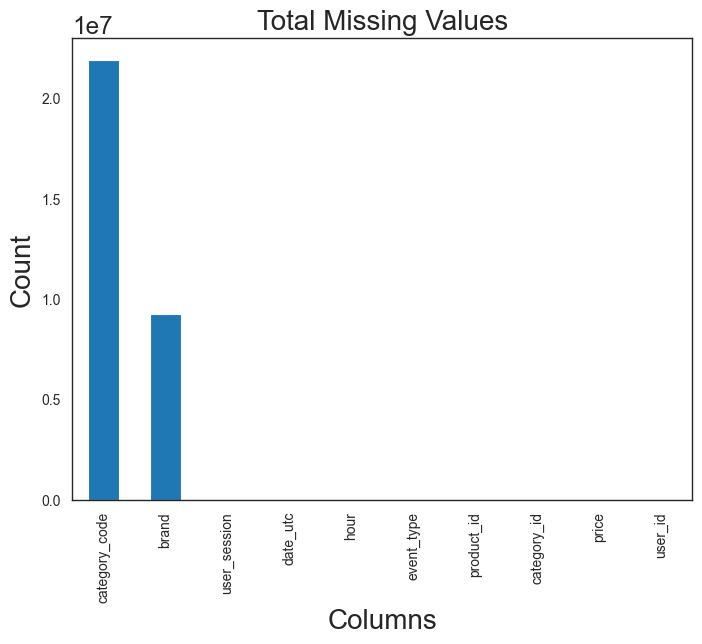

In [35]:
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [38]:
# Find missing values in the data
print('There are {} missing values in the data.'.format(df.isna().sum().sum))

There are <bound method NDFrame._add_numeric_operations.<locals>.sum of date_utc                0
hour                    0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64> missing values in the data.


In [ ]:
isna = df.isna()
isna.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False


Because we have to many NaN values in our datasets and our dataset is time series data, There are 2 alternative methods we can use:
1. We can use "forward fill" that is imputing the values with the previous value instead.
2. We can use "backward fill" that is imputing the values with the next value instead.
3. We can use "unknown" that is imputing the values with "unknown" string instead.

In this case, we going to use "forward fill"

In [49]:
# "Unknown" Fill

#df_Nov = df_Nov.fillna(method='ffill')
df_Nov = df_Nov.fillna('unknown')
df_Nov.head(10)

,event_time,date_utc,hour,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,2019-11-01,0,view,1003461,2053013555631882655,electronics,smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,2019-11-01,0,view,5000088,2053013566100866035,appliances,sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,2019-11-01,0,view,17302664,2053013553853497655,unknown,unknown,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,2019-11-01,0,view,3601530,2053013563810775923,appliances,kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,2019-11-01,0,view,1004775,2053013555631882655,electronics,smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,2019-11-01 00:00:01 UTC,2019-11-01,0,view,1306894,2053013558920217191,computers,notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
6,2019-11-01 00:00:01 UTC,2019-11-01,0,view,1306421,2053013558920217191,computers,notebook,hp,514.56,514028527,df8184cc-3694-4549-8c8c-6b5171877376
7,2019-11-01 00:00:02 UTC,2019-11-01,0,view,15900065,2053013558190408249,unknown,unknown,rondell,30.86,518574284,5e6ef132-4d7c-4730-8c7f-85aa4082588f
8,2019-11-01 00:00:02 UTC,2019-11-01,0,view,12708937,2053013553559896355,unknown,unknown,michelin,72.72,532364121,0a899268-31eb-46de-898d-09b2da950b24
9,2019-11-01 00:00:02 UTC,2019-11-01,0,view,1004258,2053013555631882655,electronics,smartphone,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0


In [48]:
df_Nov

,event_time,date_utc,hour,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,2019-11-01,0,view,1003461,2053013555631882655,electronics,smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,2019-11-01,0,view,5000088,2053013566100866035,appliances,sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,2019-11-01,0,view,17302664,2053013553853497655,unknown,unknown,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,2019-11-01,0,view,3601530,2053013563810775923,appliances,kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,2019-11-01,0,view,1004775,2053013555631882655,electronics,smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...,...,...,...
67501974,2019-11-30 23:59:58 UTC,2019-11-30,23,view,15700137,2053013559733912211,unknown,unknown,unknown,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
67501975,2019-11-30 23:59:58 UTC,2019-11-30,23,view,28719425,2053013565639492569,apparel,shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59 UTC,2019-11-30,23,view,1004833,2053013555631882655,electronics,smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59 UTC,2019-11-30,23,view,2701706,2053013563911439225,appliances,kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


In [50]:
# Check NaN values
df_Nov.isna().sum()

event_time       0
date_utc         0
hour             0
event_type       0
product_id       0
category_id      0
main_category    0
sub_category     0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

### 3. Customer Behavior Analysis

#### Visitors, Possible Customers & Buyers

In [51]:
visitors = (df_Nov.groupby('event_type')
            ['user_id'].agg(['count'])
            .sort_values(by='count', ascending=False)
            .rename(columns={"count":"count_of_users"})
            .reset_index())
visitors['prcnt'] = (100 * visitors['count_of_users'] / visitors['count_of_users'].sum()).round(1)
print(visitors)

px.pie(visitors, values='prcnt', names='event_type')

  event_type  count_of_users  prcnt
0       view        63556110   94.2
1       cart         3028930    4.5
2   purchase          916939    1.4


#### Customer activity is stable over the month & increased at Nov 14-17, 2019 (wednesday-sunday)

In [54]:
# engagement of customers towards the store (view, cart, purchase) count
activity = df_Nov.groupby(['date_utc','hour'])['user_id'].agg(['count']).reset_index().sort_values(by=['date_utc','hour'])
activity['time'] = pd.to_datetime(activity['hour'], format='%H').dt.strftime('%I %p')
activity['week_day'] = activity['date_utc'].dt.day_name()
activity['day'] = activity['date_utc'].dt.day_of_week
activity

,date_utc,hour,count,time,week_day,day
0,2019-11-01,0,10887,12 AM,Friday,4
1,2019-11-01,1,14000,01 AM,Friday,4
2,2019-11-01,2,32498,02 AM,Friday,4
3,2019-11-01,3,49348,03 AM,Friday,4
4,2019-11-01,4,61480,04 AM,Friday,4
...,...,...,...,...,...,...
715,2019-11-30,19,64202,07 PM,Saturday,5
716,2019-11-30,20,40506,08 PM,Saturday,5
717,2019-11-30,21,23230,09 PM,Saturday,5
718,2019-11-30,22,14195,10 PM,Saturday,5


In [80]:
month_activity = activity.groupby('date_utc')['count'].agg(['sum']).reset_index()
fig = px.bar(month_activity, x='date_utc', y='sum', title="Sum of Users Over the Month")
fig.update_xaxes(tickmode='linear')
fig.show()

week_activity = activity.groupby(['week_day', 'day'])['count'].agg(['mean']).round().astype('uint32').rename(columns={'mean':'average_user_by_day'}).sort_values(by='day').reset_index()
fig1 = px.line(week_activity, x='week_day', y='average_user_by_day', text='average_user_by_day', title="Average User Count by Day")
fig1.update_xaxes(type='category')
fig1.show()

time_activity = activity.groupby(['hour', 'time'])['count'].agg(['mean']).round().astype('uint32').rename(columns={'mean':'average_users_by_hour'}).reset_index()
fig2 = px.line(time_activity, x='time', y='average_users_by_hour', title="Average User Count by Hour")
fig2.update_xaxes(tickmode='linear', type='category')
fig2.show()

#### Monthly User Behavior Funnel Chart

In [62]:
import pandas as pd
import plotly.express as px

# Assuming you have a column 'event_type' and 'event_time' in your DataFrame df_Nov
# Replace 'November' with the actual month you want to analyze
month = 'November'

# Convert 'event_time' to datetime if it's not already
df_Nov['event_time'] = pd.to_datetime(df_Nov['event_time'])

# Filter for the specified month and remove 'remove_from_cart'
user_behavior = df_Nov[(df_Nov['event_time'].dt.month_name() == month) & 
                       (df_Nov['event_type'] != 'remove_from_cart')]

# Count the occurrences of each event type
event_type_count = user_behavior['event_type'].value_counts()

# Sort the data by count in descending order
event_type_count = event_type_count.sort_values(ascending=False)

# Create and display the funnel chart
fig = px.funnel(event_type_count, x=event_type_count.values, y=event_type_count.index, 
                title=f"Online user behavior funnel analysis, {month} 2019")
fig.show()


#### Store's Revenues Analysis

In [69]:
# we're gonna remove items with 'purchase' event type in our dataframe
purchase = df_Nov[df_Nov['event_type'] == 'purchase']

# removing purchase data from original data then dropping duplicates
# df_Nov = df_Nov[df_Nov['event_type'] != 'purchase'].drop_duplicates()

# concatenating both data
# df_Nov = pd.concat([df_Nov, purchase], ignore_index=True)
# df_Nov

In [70]:
purchase

,event_time,date_utc,hour,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
107,2019-11-01 00:00:41+00:00,2019-11-01,0,purchase,13200605,2053013557192163841,furniture,bedroom.bed,unknown,566.30,559368633,d6034fa2-41fb-4ac0-9051-55ea9fc9147a
168,2019-11-01 00:01:04+00:00,2019-11-01,0,purchase,1005161,2053013555631882655,electronics,smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d
707,2019-11-01 00:04:51+00:00,2019-11-01,0,purchase,1004856,2053013555631882655,electronics,smartphone,samsung,128.42,562958505,0f039697-fedc-40fa-8830-39c1a024351d
811,2019-11-01 00:05:34+00:00,2019-11-01,0,purchase,26401669,2053013563651392361,unknown,unknown,lucente,109.66,541854711,c41c44d5-ef9b-41b9-9cd6-8d96dda6e927
939,2019-11-01 00:06:33+00:00,2019-11-01,0,purchase,1801881,2053013554415534427,electronics,video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e
...,...,...,...,...,...,...,...,...,...,...,...,...
67501725,2019-11-30 23:58:14+00:00,2019-11-30,23,purchase,1004874,2053013555631882655,electronics,smartphone,samsung,346.70,547804983,717566cf-ef93-4078-ba8f-169a3ac9f1a0
67501745,2019-11-30 23:58:22+00:00,2019-11-30,23,purchase,1005130,2053013555631882655,electronics,smartphone,apple,1437.02,515582054,829c20b5-696e-4a8a-8a9f-171014a3ecbe
67501824,2019-11-30 23:58:57+00:00,2019-11-30,23,purchase,1004767,2053013555631882655,electronics,smartphone,samsung,235.60,579876821,ca50e291-43f3-4ca2-9e13-20ee6b8b25f0
67501863,2019-11-30 23:59:15+00:00,2019-11-30,23,purchase,3701309,2053013565983425517,appliances,environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c


In [71]:
revenue = purchase.groupby(['date_utc', 'hour'])['price'].sum().reset_index().round(2)
revenue['time'] = pd.to_datetime(revenue['hour'], format='%H').dt.strftime('%I %p')
revenue['week_day'] = revenue['date_utc'].dt.day_name()
revenue['day'] = revenue['date_utc'].dt.day_of_week
revenue.head()

,date_utc,hour,price,time,week_day,day
0,2019-11-01,0,39277.66,12 AM,Friday,4
1,2019-11-01,1,36209.35,01 AM,Friday,4
2,2019-11-01,2,113181.38,02 AM,Friday,4
3,2019-11-01,3,240591.16,03 AM,Friday,4
4,2019-11-01,4,373155.02,04 AM,Friday,4


In [79]:
rev_month = revenue.groupby(['date_utc'])['price'].sum().round(2).reset_index()
fig = px.bar(rev_month, x='date_utc', y='price', title='Revenue Over The Month')
fig.update_xaxes(tickmode='linear')
fig.show()

rev_week = revenue.groupby(['day', 'week_day'])['price'].agg(['mean']).round(2).reset_index()
fig1 = px.line(rev_week, x='week_day', y='mean', text='mean', title='Average Revenue Over by Day Of Week')
fig1.update_xaxes(tickmode='linear')
fig1.show()

rev_hour = revenue.groupby(['hour', 'time'])['price'].mean().round(2).reset_index()
fig2 = px.line(rev_hour, x='time', y='price', text='price', title='Average Revenue Over The Hour')
fig2.update_xaxes(tickmode='linear')
fig2.show()

In [84]:
# Average Purchase Activity Over The Hour For The Whole Month
rev_hour = purchase.groupby(['date_utc', 'hour'])['user_id'].agg(['count']).reset_index()
rev_hour = rev_hour.groupby('hour')['count'].agg(['mean']).round().astype('uint16').rename(columns={'mean': 'average_purchase_activity'}).reset_index()
rev_hour['time'] = pd.to_datetime(rev_hour['hour'], format='%H').dt.strftime('%I %p')
fig = px.line(rev_hour, x='time', y='average_purchase_activity', text='average_purchase_activity', title='Average Purchase Activity Over The Hour For The Whole Month')
fig.update_xaxes(tickmode='linear')
fig.show()

# Top 10 Brands in terms of Revenue
item = purchase.groupby('brand')['price'].agg(['sum']).sort_values(by='sum', ascending=False).round(2).reset_index().iloc[0:10]
item['brand'] = item['brand'].str.capitalize()
fig1 = px.bar(item, x='brand', y='sum', title='Top 10 Brands in terms of Revenue')
fig1.update_xaxes(tickmode='linear')
fig1.show()

# Top 10 Brands in Terms of Purchase Count
p_item = purchase['brand'].value_counts().reset_index().iloc[0:10]
p_item['brand'] = p_item['brand'].str.capitalize()
fig2 = px.bar(p_item, x='brand', y='count', text='count',title='Top 10 Brands in Terms of Purchase Count')
fig2.update_xaxes(tickmode='linear')
fig2.show()

# Top 10 Category Item in terms of Revenue
item2 = purchase.groupby('main_category')['price'].agg(['sum']).sort_values(by='sum', ascending=False).round(2).reset_index().iloc[0:10]
item2['main_category'] = item2['main_category'].str.capitalize()
fig3 = px.bar(item2, x='main_category', y='sum', title='Top 10 Category Item in terms of Revenue')
fig3.update_xaxes(tickmode='linear')
fig3.show()

# Top 10 Category Item in Terms of Purchase Count
p_item2 = purchase['main_category'].value_counts().reset_index().iloc[0:10]
p_item2['main_category'] = p_item2['main_category'].str.capitalize()
fig4 = px.bar(p_item2, x='main_category', y='count', text='count',title='Top 10 Category Item in Terms of Purchase Count')
fig4.update_xaxes(tickmode='linear')
fig4.show()

# Top 10 Sub Category Item in terms of Revenue
item3 = purchase.groupby('sub_category')['price'].agg(['sum']).sort_values(by='sum', ascending=False).round(2).reset_index().iloc[0:10]
item3['sub_category'] = item3['sub_category'].str.capitalize()
fig5 = px.bar(item3, x='sub_category', y='sum', title='Top 10 Sub Category Item in terms of Revenue')
fig5.update_xaxes(tickmode='linear')
fig5.show()

# Top 10 Sub Category Item in Terms of Purchase Count
p_item3 = purchase['sub_category'].value_counts().reset_index().iloc[0:10]
p_item3['sub_category'] = p_item3['sub_category'].str.capitalize()
fig6 = px.bar(p_item3, x='sub_category', y='count', text='count',title='Top 10 Sub Category Item in Terms of Purchase Count')
fig6.update_xaxes(tickmode='linear')
fig6.show()

loyal = (purchase.groupby(['user_id'])['price'].agg(['sum']).round(2).rename(columns={"sum":"amount_spent"})
         .sort_values(by='amount_spent', ascending=False).reset_index().iloc[0:10])
fig7 = px.bar(loyal, x='user_id',  y='amount_spent', text='amount_spent',title='Top 10 Customers via Amount Spent')
fig7.update_xaxes(tickmode='linear', type='category')
fig7.show()

## Feature Engineering

In [85]:
df_Nov

,event_time,date_utc,hour,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,2019-11-01,0,view,1003461,2053013555631882655,electronics,smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00+00:00,2019-11-01,0,view,5000088,2053013566100866035,appliances,sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01+00:00,2019-11-01,0,view,17302664,2053013553853497655,unknown,unknown,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01+00:00,2019-11-01,0,view,3601530,2053013563810775923,appliances,kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01+00:00,2019-11-01,0,view,1004775,2053013555631882655,electronics,smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...,...,...,...
67501974,2019-11-30 23:59:58+00:00,2019-11-30,23,view,15700137,2053013559733912211,unknown,unknown,unknown,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
67501975,2019-11-30 23:59:58+00:00,2019-11-30,23,view,28719425,2053013565639492569,apparel,shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59+00:00,2019-11-30,23,view,1004833,2053013555631882655,electronics,smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59+00:00,2019-11-30,23,view,2701706,2053013563911439225,appliances,kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


### 1. Change Object to Integer

In [5]:
df = pd.read_parquet('2019-Nov-clean.parquet')

In [16]:
# removing purchase data from original data then dropping duplicates
df = df[df['event_type'] != 'purchase'].drop_duplicates()

In [18]:
from sklearn.preprocessing import LabelEncoder
le9 = LabelEncoder()
df['event_type_encoded'] = le9.fit_transform(df['event_type'])

In [19]:
df.to_parquet('2019-Nov-clean.parquet', index=False)

### Label Encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder untuk setiap fitur
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()

# Transformasi data untuk masing-masing fitur
df['event_type_encoded'] = le1.fit_transform(df['event_type'])
df['product_id_encoded'] = le2.fit_transform(df['product_id'])
df['category_id_encoded'] = le3.fit_transform(df['category_id'])
df['sub_category_encoded'] = le4.fit_transform(df['sub_category'])
df['price_encoded'] = le5.fit_transform(df['price'])
df['brand_encoded'] = le6.fit_transform(df['brand'])
df['event_time_encoded'] = le7.fit_transform(df['event_time'])
df['user_session_encoded'] = le8.fit_transform(df['user_session'])

In [11]:
le9 = LabelEncoder()
df['main_category_encoded'] = le9.fit_transform(df['main_category'])

### 2. Feature Selection: Chi Square Test

In [9]:
df

,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session,event_type_encoded,product_id_encoded,category_id_encoded,sub_category_encoded,price_encoded,brand_encoded,time,event_time_encoded,user_session_encoded
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics,smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2,197,84,102,37104,4097,2019-11-01 00:00:00 UTC,0,4156059
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances,sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,2,19043,322,88,26059,1798,2019-11-01 00:00:00 UTC,0,7664389
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,unknown,unknown,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,2,81034,39,126,2748,839,2019-11-01 00:00:01 UTC,1,6315299
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances,kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,2,11821,280,73,44767,2152,2019-11-01 00:00:01 UTC,1,3228754
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics,smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,2,868,84,102,17577,4097,2019-11-01 00:00:01 UTC,1,2648540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67501974,2019-11-30 23:59:58 UTC,view,15700137,2053013559733912211,unknown,unknown,unknown,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b,2,72861,177,126,24941,3856,2019-11-30 23:59:58 UTC,2549557,145619
67501975,2019-11-30 23:59:58 UTC,view,28719425,2053013565639492569,apparel,shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359,2,146459,309,90,6187,352,2019-11-30 23:59:58 UTC,2549557,6205800
67501976,2019-11-30 23:59:59 UTC,view,1004833,2053013555631882655,electronics,smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb,2,918,84,102,16129,3266,2019-11-30 23:59:59 UTC,2549558,6024494
67501977,2019-11-30 23:59:59 UTC,view,2701706,2053013563911439225,appliances,kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0,2,8959,283,69,40211,3266,2019-11-30 23:59:59 UTC,2549558,2936665


In [13]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Assume df_Nov is your DataFrame containing the data

# Encode categorical features
encoder = LabelEncoder()
categorical_cols = ['event_time_encoded', 'product_id_encoded', 'category_id_encoded', 'main_category_encoded', 'sub_category_encoded', 'brand_encoded', 'price_encoded', 'user_id', 'user_session_encoded']  # Add categorical feature column names
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Select features and target
X = df[categorical_cols]  # Select your categorical features
y = df['event_type']  # Assume 'event_type' is the column representing customer behavior

# Perform chi-squared test
chi2_stat, p_val = chi2(X, y)

# Create a DataFrame to display the results
chi2_results = pd.DataFrame({'Feature': categorical_cols, 'Chi2 Statistic': chi2_stat, 'P-value': p_val})
print('Chi-squared test results:')
print(chi2_results)

Chi-squared test results:
                 Feature  Chi2 Statistic       P-value
0     event_time_encoded    4.520654e+10  0.000000e+00
1     product_id_encoded    2.431225e+10  0.000000e+00
2    category_id_encoded    3.103397e+07  0.000000e+00
3  main_category_encoded    4.356330e+02  2.532147e-95
4   sub_category_encoded    1.333718e+05  0.000000e+00
5          brand_encoded    1.104886e+07  0.000000e+00
6          price_encoded    2.552727e+07  0.000000e+00
7                user_id    4.023244e+10  0.000000e+00
8   user_session_encoded    3.891992e+06  0.000000e+00


### 3. Feature Selection: LASSO Regression

In [ ]:
'''import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Load your data, assuming df contains your dataset

# Assuming your features are in X and target is in y
X = df.drop('event_type', axis=1)  # Adjust 'target_column' to your actual target
y = df['event_type']  # Adjust 'target_column' to your actual target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit the Lasso model with cross-validation
lasso = LassoCV(cv=5)  # LassoCV automatically performs cross-validation to find the best alpha
lasso.fit(X_train, y_train)

# Get the selected features and their coefficients
selected_features = X.columns[lasso.coef_ != 0]
coefficients = lasso.coef_[lasso.coef_ != 0]

# Display the selected features and their coefficients
feature_coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
})
print('Selected Features:')
print(feature_coefficients)

# Optionally, you can also use the selected features for further analysis or modeling'''

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your data, assuming df contains your dataset

# Assuming your features are in X and target is in y
X = df[['event_time_encoded', 'product_id_encoded', 'category_id_encoded', 'main_category_encoded', 'sub_category_encoded', 'brand_encoded', 'price_encoded', 'user_id', 'user_session_encoded']] # Adjust 'target_column' to your actual target
y = df['event_type']  # Adjust 'target_column' to your actual target

# Encode the target (assuming it's a string column)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit the Lasso model with cross-validation
lasso = LassoCV(cv=5)  # LassoCV automatically performs cross-validation to find the best alpha
lasso.fit(X_train, y_train)

# Get the selected features and their coefficients
selected_features = X.columns[lasso.coef_ != 0]
coefficients = lasso.coef_[lasso.coef_ != 0]

# Display the selected features and their coefficients
feature_coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
})
print('Selected Features:')
print(feature_coefficients)

# Optionally, you can also use the selected features for further analysis or modeling

##### Top 5 features

So we choose: event_time, product_id, category_id, sub_category, price

## Modeling

In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_parquet('2019-Nov-clean.parquet')

In [9]:
df

,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session,event_type_encoded,product_id_encoded,category_id_encoded,sub_category_encoded,price_encoded,brand_encoded,time,event_time_encoded,user_session_encoded,main_category_encoded
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics,smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,1,197,84,102,37104,4097,2019-11-01 00:00:00 UTC,0,4156059,7
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances,sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,1,19043,322,88,26059,1798,2019-11-01 00:00:00 UTC,0,7664389,2
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,unknown,unknown,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,1,81034,39,126,2748,839,2019-11-01 00:00:01 UTC,1,6315299,13
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances,kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,1,11821,280,73,44767,2152,2019-11-01 00:00:01 UTC,1,3228754,2
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics,smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,1,868,84,102,17577,4097,2019-11-01 00:00:01 UTC,1,2648540,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66484525,2019-11-30 23:59:58 UTC,view,15700137,2053013559733912211,unknown,unknown,unknown,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b,1,72861,177,126,24941,3856,2019-11-30 23:59:58 UTC,2549557,145619,13
66484526,2019-11-30 23:59:58 UTC,view,28719425,2053013565639492569,apparel,shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359,1,146459,309,90,6187,352,2019-11-30 23:59:58 UTC,2549557,6205800,1
66484527,2019-11-30 23:59:59 UTC,view,1004833,2053013555631882655,electronics,smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb,1,918,84,102,16129,3266,2019-11-30 23:59:59 UTC,2549558,6024494,7
66484528,2019-11-30 23:59:59 UTC,view,2701706,2053013563911439225,appliances,kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0,1,8959,283,69,40211,3266,2019-11-30 23:59:59 UTC,2549558,2936665,2


### 1. Decision Tree

In [10]:
# Get the input features
X = df[['event_time_encoded', 'product_id', 'category_id', 'main_category_encoded', 'sub_category_encoded', 'brand_encoded', 'price', 'user_id']]
# Get the target variable
y = df['event_type_encoded']

In [5]:
# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 42)

In [6]:
# Train a decision tree with all default arguments
model = DecisionTreeClassifier(random_state=42)

In [7]:
model.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(random_state=42)

In [8]:
preds = model.predict(X_test)

In [9]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [10]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9121073729482633,
 'recall': 0.9463878620946616,
 'precision': 0.9610726545920464,
 'f1score': 0.9536737321062957}

In [12]:
import joblib
joblib.dump(model, 'decisiontree_model')

['decisiontree_model']

In [15]:
# loaded model
import joblib
loaded_model = joblib.load('decisiontree_model')

#### Visualization

In [23]:
def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(25, 20)) 
    tree.plot_tree(model, 
                       feature_names=feature_names.tolist(),  
                       filled=True)
    plt.show()

In [24]:
feature_names = X.columns.values

In [25]:
plot_decision_tree(model, feature_names)

### 2. Gradient Boosting Classifier: AdaBoost Classifier

In [3]:
# Get the input features
X = df[['event_time_encoded', 'product_id', 'category_id', 'main_category_encoded', 'sub_category_encoded', 'brand_encoded', 'price', 'user_id']]
# Get the target variable
y = df['event_type_encoded']

In [ ]:
# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 42)

In [ ]:
# Import the class containing the classification method
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the class
ABC = AdaBoostClassifier (estimator = DecisionTreeClassifier(),
                        learning_rate = 0.5, n_estimators = 1000)

# Fit the instance on the data and then predict the expected value
ABC = ABC.fit(X_train, y_train)
y_predict = ABC.predict(X_test)

In [ ]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [ ]:
evaluate_metrics(y_test, preds)